# Compare with Carpet

In [1]:
using DSP  # for unwrap
using Interpolations
using LaTeXStrings
using Printf
using Plots, Measures
theme(:wong2)
include("../Utils/misc-tsv.jl")
include("../Utils/misc-tool.jl")

Main.MiscTool

## Difference between the definition of Diss parameter in LazEv and Z4cow

### LazEv

https://github.com/RITnumrel/RITEvolution/blob/d4949f09969c5fad6d31068605752b42d148623d/LazEv/src/Dissip.c#L73
https://github.com/RITnumrel/RITEvolution/blob/d4949f09969c5fad6d31068605752b42d148623d/LazEv/src/macro/Dissipation.h#L24

$$
\begin{align}
Qu=(-1)^{r/2}\sigma_{(\text{LazEv})}/2^{4}\Sigma_i h_i^{r+1}D_{i+}^{r/2+1}D_{i-}^{r/2+1}u
\end{align}
$$
where $r$ denotes the order of the finite difference scheme

### Z4cow

https://github.com/lwJi/Spacetime/blob/33ee075689ab5846638094fc20c894968761dc34/Z4cowCarpet/wolfram/Z4cowCarpet_applydiss.hxx#L34
https://github.com/lwJi/Spacetime/blob/33ee075689ab5846638094fc20c894968761dc34/Z4cowCarpet/wolfram/dissinline.hxx#L25
https://github.com/lwJi/Spacetime/blob/33ee075689ab5846638094fc20c894968761dc34/Z4cowCarpet/wolfram/derivsinline.hxx#L485

$$
\begin{align}
Qu=(-1)^{r/2}\sigma_{(\text{Z4cow})}/2^{r+2}\Sigma_i h_i^{r+1}D_{i+}^{r/2+1}D_{i-}^{r/2+1}u
\end{align}
$$

Then we have
$$
\begin{align}
\sigma_{(\text{Z4cow})}=\sigma_{(\text{LazEv})} 2^{(r-2)}
\end{align}
$$

## Time Derivatives of Real Part

31167
2877
1938
1102


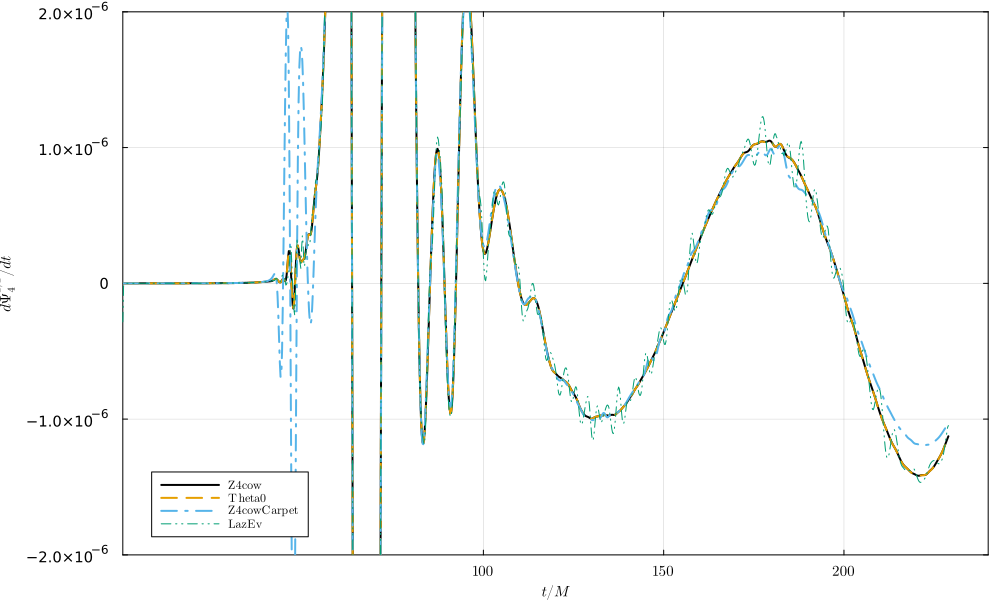

In [20]:
function interp_f_df(dat; n=1)
    x = dat[1]
    y = dat[2]
    f = linear_interpolation(x, y)
    df = linear_interpolation(x, MiscTool.derivs(x, y; n=n))
    return f, df
end
#
let dirsZ, dirsL, fZ, fL, dfZ, dfL
    dirsL = [("LazEv-low/pk_rad_obs_1_psi4_2_2.tl", "LazEv")]
    dirsZ = [("q1-Z4cow-newInitLap-low/Sum/mp_Psi4_l2_m2_r60.00.tsv", "Z4cow")]
    dirsT = [("q1-Z4cow-Theta0-newInitLap-low/Sum/mp_Psi4_l2_m2_r60.00.tsv", "Theta0")]
    dirsC = [("q1-Z4cowCarpet-low/Sum/mp_Psi4_l2_m2_r60.00.asc", "Carpet")]
    (datsL, labsL) = MiscTSV.load_data_0d(dirsL; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsZ, labsZ) = MiscTSV.load_data_0d(dirsZ; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsT, labsT) = MiscTSV.load_data_0d(dirsT; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsC, labsC) = MiscTSV.load_data_0d(dirsC; cols=[1, 2, 3], parent_dir="../../data/q1")
    
    # resample datsL, make it has similar num of data points as Z4cow
    #datsL = [[d[1:10:27611] for d in dat] for dat in datsL]
    println(length(datsL[1][1]))
    println(length(datsZ[1][1]))
    println(length(datsT[1][1]))
    println(length(datsC[1][1]))
    
    # Interpolate
    fL, dfL = interp_f_df(datsL[1])
    fZ, dfZ = interp_f_df(datsZ[1])
    fT, dfT = interp_f_df(datsT[1])
    fC, dfC = interp_f_df(datsC[1])
    
    # Plot
    plt_dtreal = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    xs = 100:50:450
    xticks!(plt_dtreal, xs, [L"%$(n)" for n in xs])
    
    x0 = datsZ[1][1][1:1100]
    plot!(plt_dtreal, x0, dfZ(x0), label=L"\mathrm{Z4cow}", linestyle=:solid, linewidth=2)
    plot!(plt_dtreal, x0, dfT(x0), label=L"\mathrm{Theta0}", linestyle=:dash, linewidth=2)
    plot!(plt_dtreal, x0, dfC(x0), label=L"\mathrm{Z4cowCarpet}", linestyle=:dashdot, linewidth=2)
    plot!(plt_dtreal, x0, -dfL(x0), label=L"\mathrm{LazEv}", linestyle=:dashdotdot)
    plot!(xlabel=L"t/M", ylabel=L"d\Psi_4^{2,2}/dt", framestyle=:box)
    plot!(plt_dtreal, xlim=(0, 240), ylim=(-2e-6,2e-6), size=(1000, 600))
    #plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e6, digits=1))"), topmargin=0.5cm)
    #annotate!(100, 4e-6*1.13, Plots.text(L"\times10^{-6}", 10, :black, :left))
    
    display(plt_dtreal)
end

## ToDo

* [ ] Different Gauge Conditions
* [ ] Usage of Symmetry
* [ ] BSSN vs Z4c